## The Sparks Foundation | GRIPJUNE21

### Author : ABHISHEK DE

### Task: Prediction using Supervised Machine Learning model (Linear Regression)
- Predicting the percentage of a student based on the study hours.
- What will be the predicted score if a student studies scores for 9.25 hrs/day?

### Linear Regression:
- In statistics, linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.
- The linear regression model provides a sloped straight line representing the relationship between the variables. Mathematically, we can represent a linear regression as: 

    y = a0 + a1*x + ε Here,

    - Y= Dependent Variable (Target Variable)
    - X= Independent Variable (predictor Variable)
    - a0= intercept of the line (Gives an additional degree of freedom)
    - a1 = Linear regression coefficient (scale factor to each input value).
    - ε = random error


### Importing Libraries

In [7]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

### Loading the data

In [8]:
url = "http://bit.ly/w-data"

stud_data = pd.read_csv(url)
print("Data imported successfully")

stud_data.head(5)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Size & Shape of the dataset

In [9]:
stud_data.shape

(25, 2)

There are total 25 rows and 2 columns present in the dataset.

### Summary Statistics

In [10]:
stud_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Observations:
- The Mean value is greater than the median value 50% percentile.
- The difference between max value and value at 75% percentile is very small.
- From above obeservations, we can draw the inference that there are no outliers present in the data.

### Relationship between Independent variable & Target variable


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

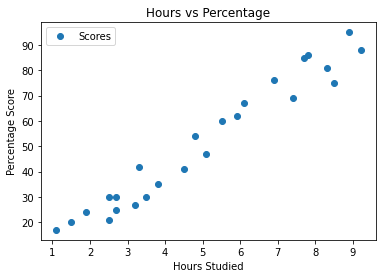

In [11]:
stud_data.plot(x='Hours', y='Scores', style='o')  

plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  

plt.show()

- From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.
- We can observe from the scatterplot that, if the student increases his/her study hours, his/her score might also increase.

### Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [12]:
# Defining the Independent variable & Dependent variable

X = stud_data.drop('Scores', axis=1)
y = stud_data['Scores']

The next step is to split the dataset into Train Data and Test Data. We'll achieve this by Scikit-Learn's test_train_split function

In [13]:
# Splitting the data

from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=100)

### Building a Linear Regression model 

In [14]:
from sklearn.linear_model import LinearRegression  

regression = LinearRegression()  
regression.fit(X_train, y_train) 

print("Training complete.")

Training complete.


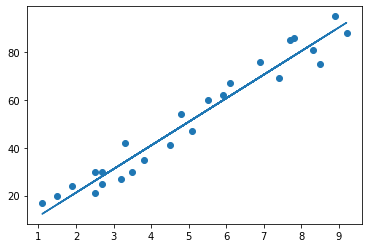

In [15]:
# Plotting the regression line

line = regression.coef_*X + regression.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Making Predictions

In [16]:
# Testing data - In Hours

print(X_test) 

# Predicting the scores

y_pred = regression.predict(X_test) 

    Hours
9     2.7
22    3.8
13    3.3
11    5.9
5     1.5
19    7.4
23    6.9
21    4.8


In [17]:
# Comparing Actual vs Predicted

comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
comp 

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


In [18]:
# Testing the with a specific value

hours=9.25
test_pred = regression.predict([[9.25]])

print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(test_pred))

No of Hours = 9.25
Predicted Score = [92.80850057]


#### Conclusion: 
- With the help of Linear Regression model we predicted that if a student studies for an average of 9.25 hours/day then, he/she can score >90%.

### Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [19]:
from sklearn import metrics  

print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.762517892332273
